# **Yolov9**

## **Testing the GPUs**

In [ ]:
!nvidia-smi

Fri Mar 15 20:08:20 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0              32W /  70W |      0MiB / 15360MiB |     31%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content/yolov9


In [ ]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Counting objects: 100% (172/172), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 325 (delta 134), reused 102 (delta 102), pack-reused 153
Receiving objects: 100% (325/325), 2.26 MiB | 12.26 MiB/s, done.
Resolving deltas: 100% (159/159), done.
/content/yolov9/yolov9


In [ ]:
!pip install -q roboflow

## **Downloading the weights**

In [ ]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [ ]:
!ls -la {HOME}/weights

total 402448
drwxr-xr-x  2 root root      4096 Mar 15 20:08 .
drwxr-xr-x 16 root root      4096 Mar 15 20:08 ..
-rw-r--r--  1 root root  51508261 Feb 18 12:36 gelan-c.pt
-rw-r--r--  1 root root 117203713 Feb 18 12:36 gelan-e.pt
-rw-r--r--  1 root root 103153312 Feb 18 12:36 yolov9-c.pt
-rw-r--r--  1 root root 140217688 Feb 18 12:36 yolov9-e.pt


In [ ]:
%cd {HOME}/yolov9

/content/yolov9/yolov9


## **Downloading the dataset**

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="EqRZ1z1Qxat4scafD4Cf")
project = rf.workspace("coffee-beans-4qgnq").project("bunnah-tmpmr")
version = project.version(13)
dataset = version.download("yolov9")

## **Changing the classes number**

In [ ]:
!pip install pyyaml

In [ ]:
import torch

# Load the model
model = torch.load('/content/weights/gelan-e.pt')

# Modify the nc parameter
new_nc = 4  # New number of classes
model['nc'] = new_nc

# Save the updated model to a new file
torch.save(model, '/content/weights/gelan-e.pt')

## **Training**

## Weights: gelan-e

In [ ]:
%cd {HOME}/yolov9

!python train.py \
--batch 1 --epochs 16 --img 416 --device 0 --min-items 0 --close-mosaic 16\
--data /content/yolov9/Bunnah-13/data.yaml \
--weights {HOME}/weights/gelan-e.pt \
--cfg models/detect/gelan-e.yaml \
--hyp hyp.scratch-high.yaml

/content/yolov9
2024-03-15 18:07:21.955563: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-15 18:07:21.955612: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-15 18:07:21.957163: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-15 18:07:23.189600: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=/content/weights/gelan-e.pt, cfg=models/detect/gelan-e.yaml, data=/content/yolov9/Bunnah-13/data.yaml, hyp=hyp.scratch-high.yaml, epochs=16, batch_size=1, imgsz=416, rect=False, resume=False, nosave=False, nova

In [ ]:
!ls {HOME}/yolov9/runs/train/exp6/

confusion_matrix.png				     PR_curve.png	    val_batch0_pred.jpg
events.out.tfevents.1710363912.8c7673821bad.14353.0  R_curve.png	    val_batch1_labels.jpg
F1_curve.png					     results.csv	    val_batch1_pred.jpg
hyp.yaml					     results.png	    val_batch2_labels.jpg
labels_correlogram.jpg				     train_batch0.jpg	    val_batch2_pred.jpg
labels.jpg					     train_batch1.jpg	    weights
opt.yaml					     train_batch2.jpg
P_curve.png					     val_batch0_labels.jpg


## **Seeing the results**

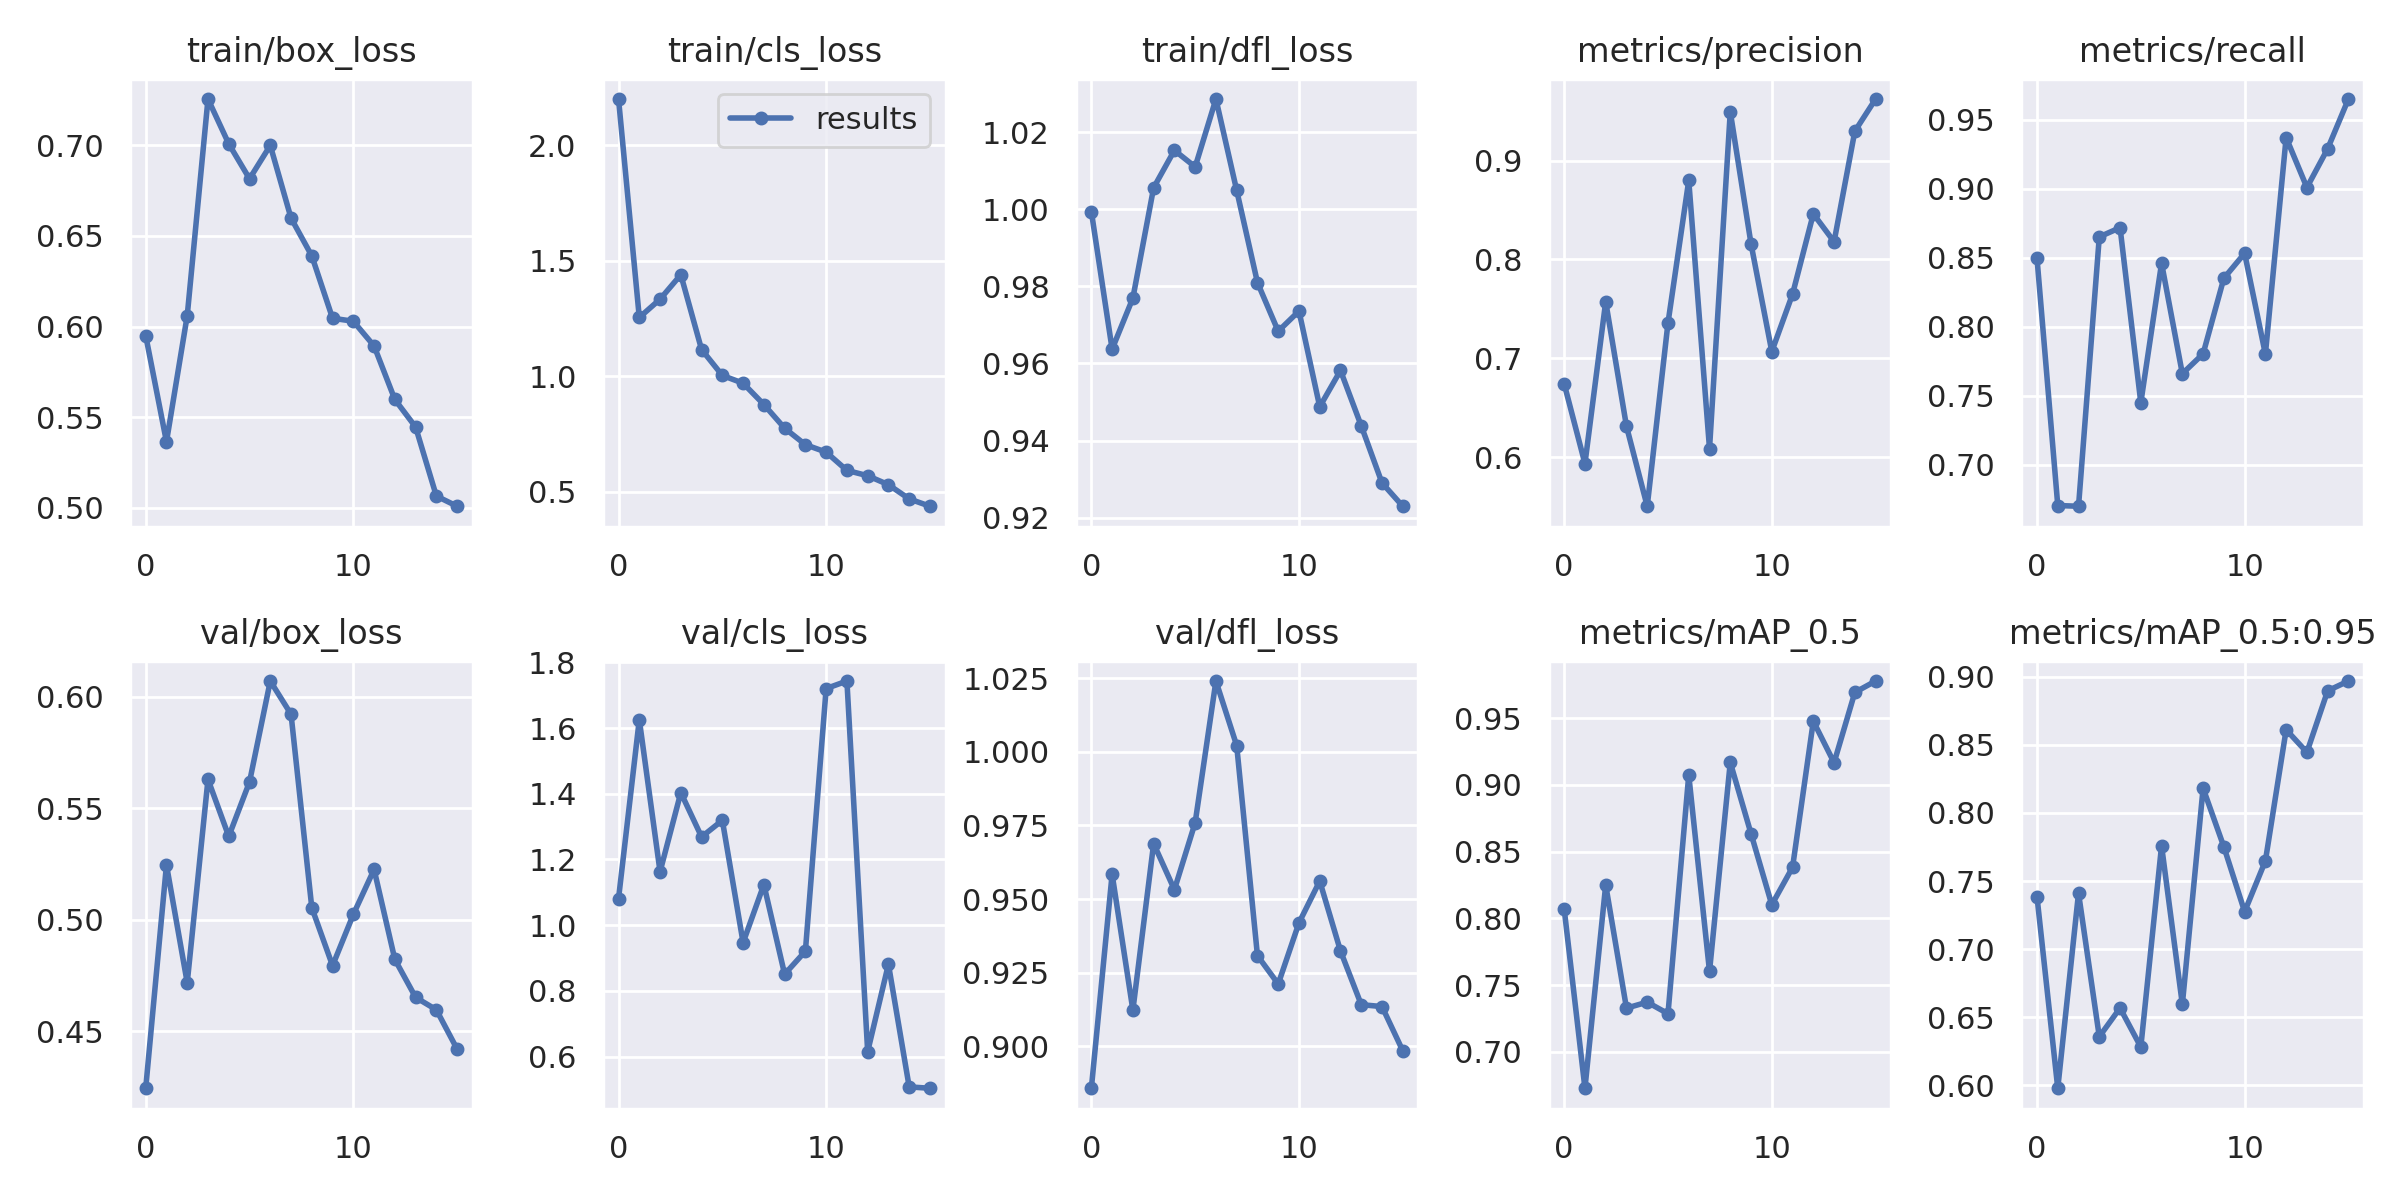

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp6/results.png", width=1000)

## **Seeing the confusion matrix**

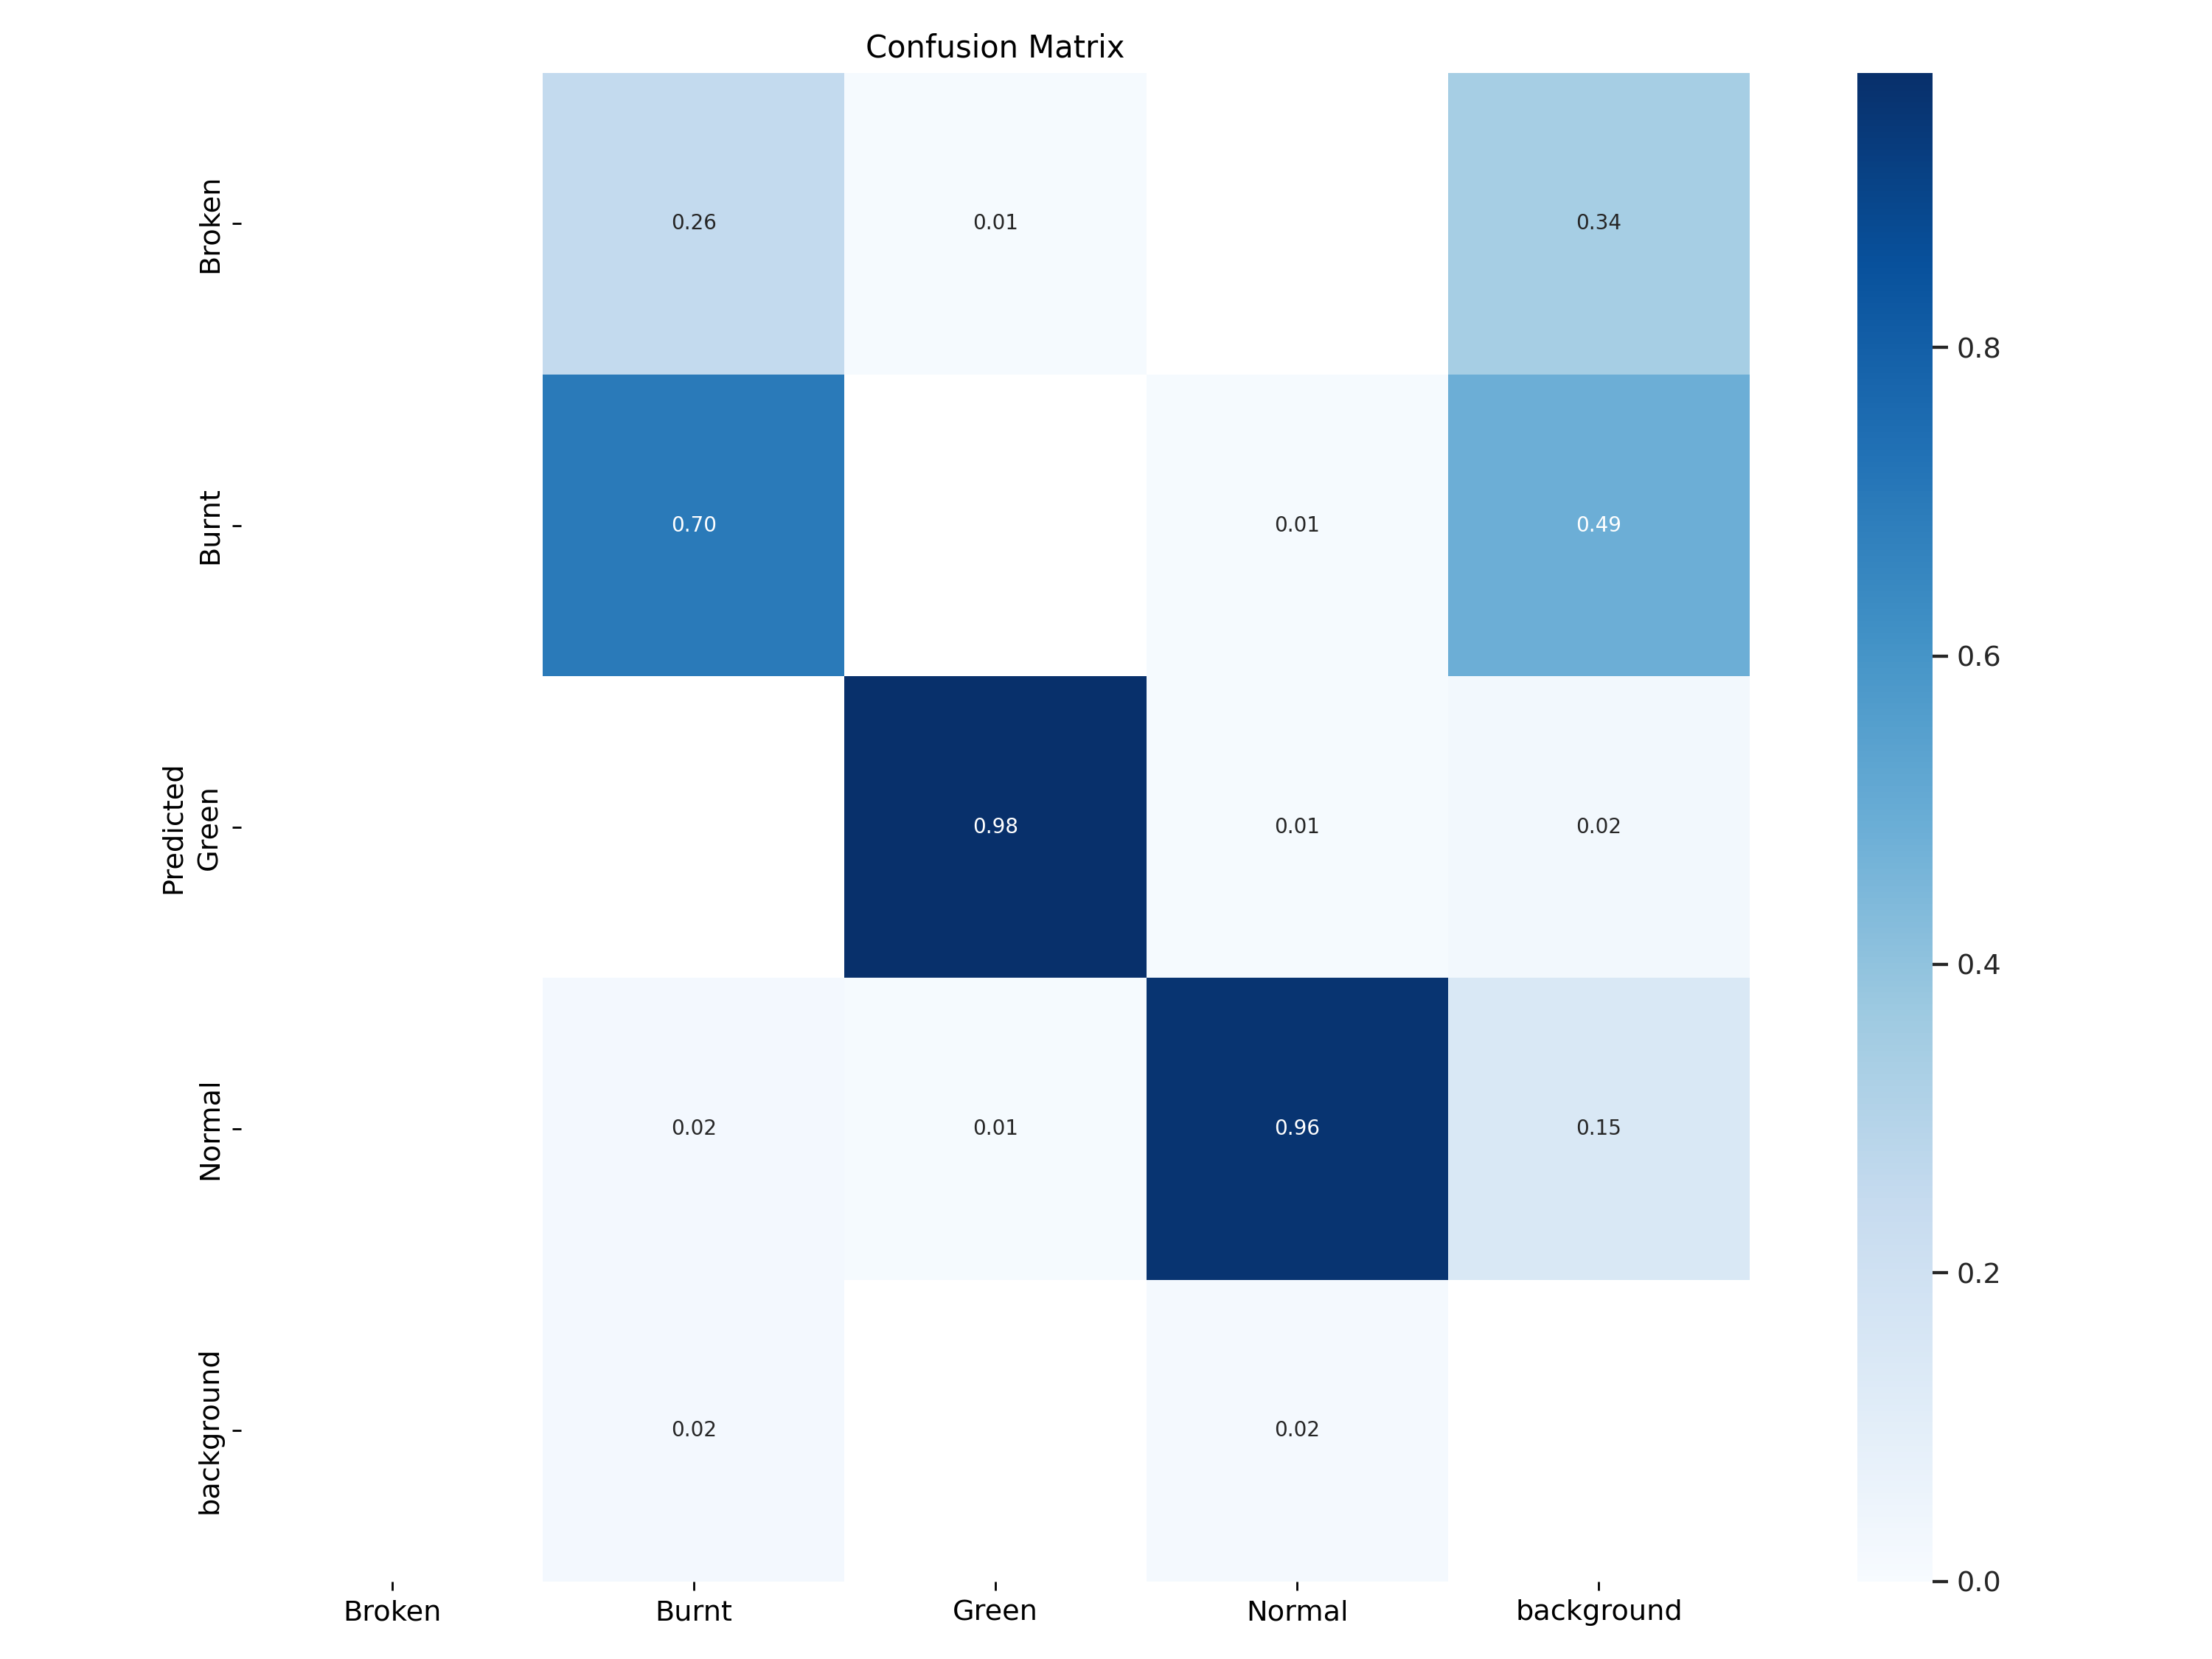

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp12/confusion_matrix.png", width=1000)

## **Training Output**

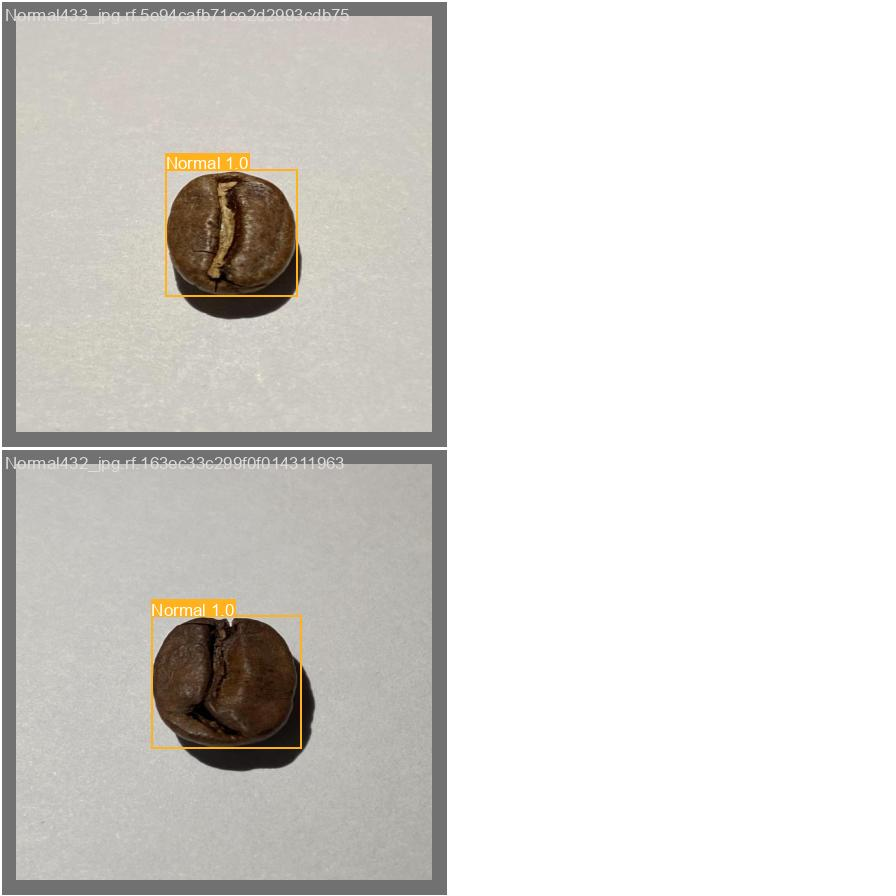

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp12/val_batch1_pred.jpg", width=1000)

# Validation of training:

In [ ]:
%cd {HOME}/yolov9

!python val.py \
--img 416 --batch 1 --conf 0.001 --iou 0.7 --device 0 \
--data {dataset.location}/data.yaml \
--weights {HOME}/yolov9/runs/train/exp12/weights/best.pt

/content/yolov9
val: data=/content/yolov9/Bunnah-Project-23/data.yaml, weights=['/content/yolov9/runs/train/exp12/weights/best.pt'], batch_size=1, imgsz=416, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-e summary: 930 layers, 58005148 parameters, 0 gradients, 190.8 GFLOPs
val: Scanning /content/yolov9/Bunnah-Project-23/test/labels.cache... 369 images, 0 backgrounds, 0 corrupt: 100% 369/369 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 369/369 [00:19<00:00, 18.55it/s]
                   all        369        371      0.962      0.965      0.978      0.896
                 Burnt        369         

# testing:

In [ ]:
!python detect.py \
--img 416 --conf 0.1 --device 0 \
--weights {HOME}/yolov9/runs/train/exp12/weights/best.pt \
--source {dataset.location}/test/images

detect: weights=['/content/yolov9/runs/train/exp12/weights/best.pt'], source=/content/yolov9/Bunnah-Project-23/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-e summary: 930 layers, 58005148 parameters, 0 gradients, 190.8 GFLOPs
image 1/369 /content/yolov9/Bunnah-Project-23/test/images/Burnt118_jpg.rf.e090eb021f3dd279b24c3eaa07e30844.jpg: 416x416 1 Burnt, 59.8ms
image 2/369 /content/yolov9/Bunnah-Project-23/test/images/Burnt123_jpg.rf.6e7fc1af02f2c88c8b45cbb94ce36f34.jpg: 416x416 1 Burnt, 44.7ms
image 3/369 /content/yolov9/Bunnah-P

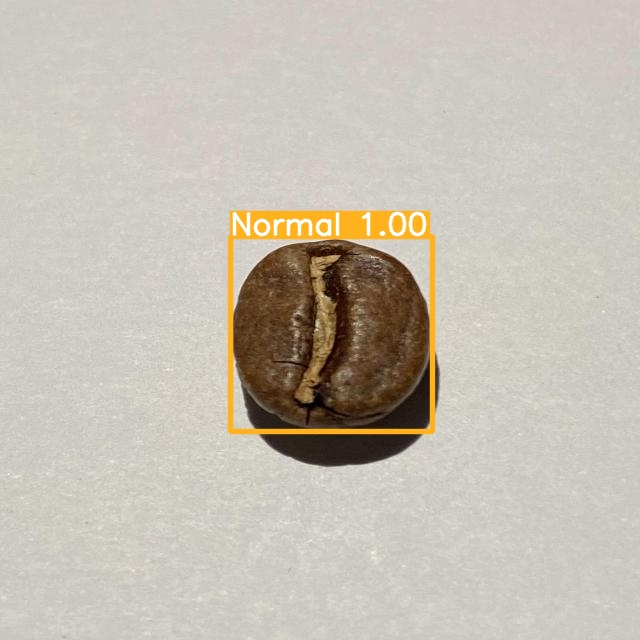

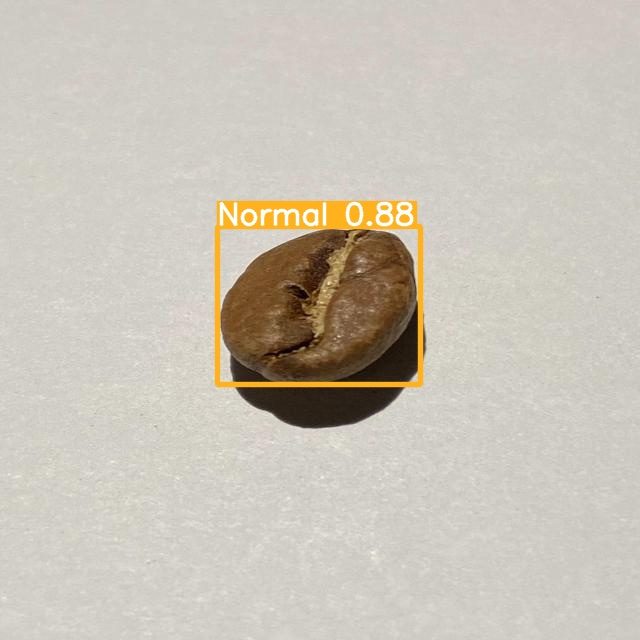

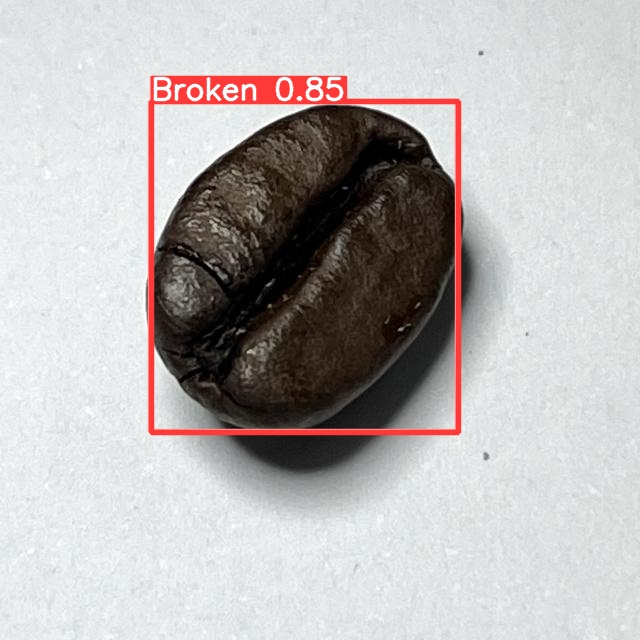

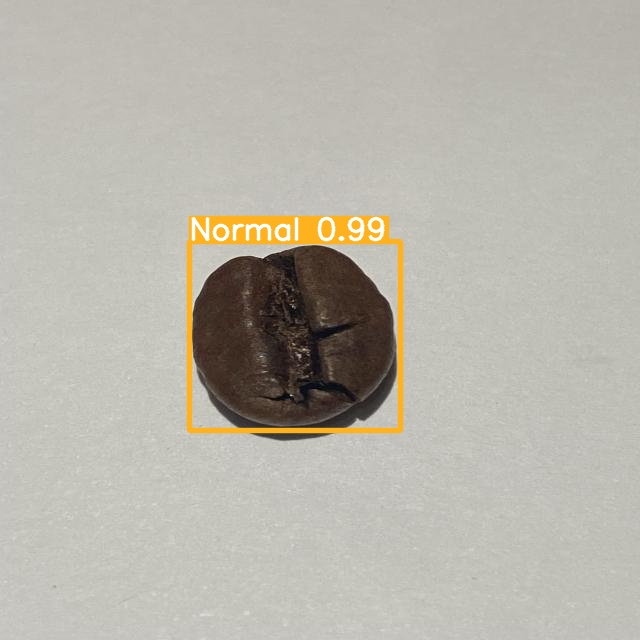

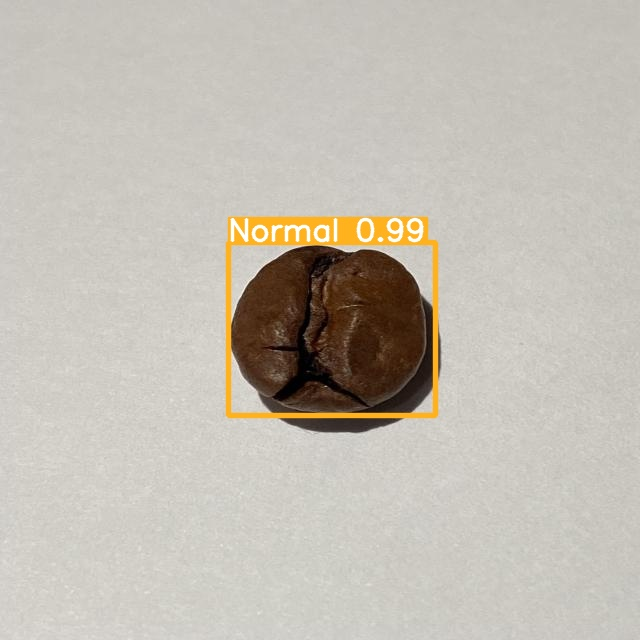

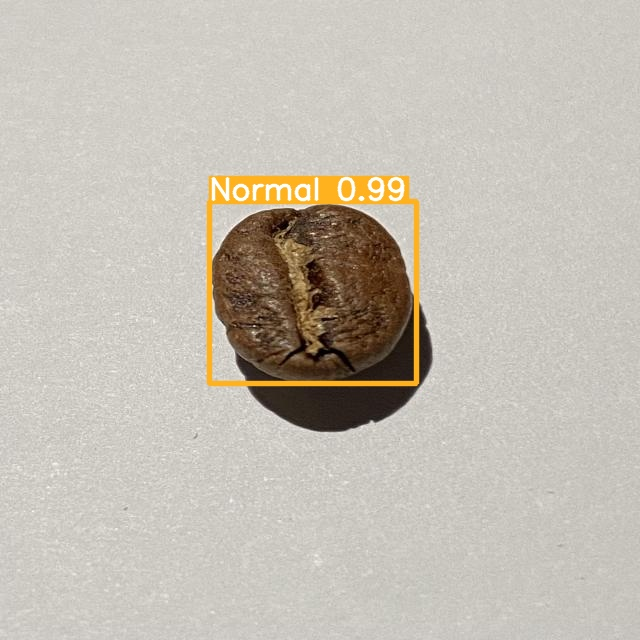

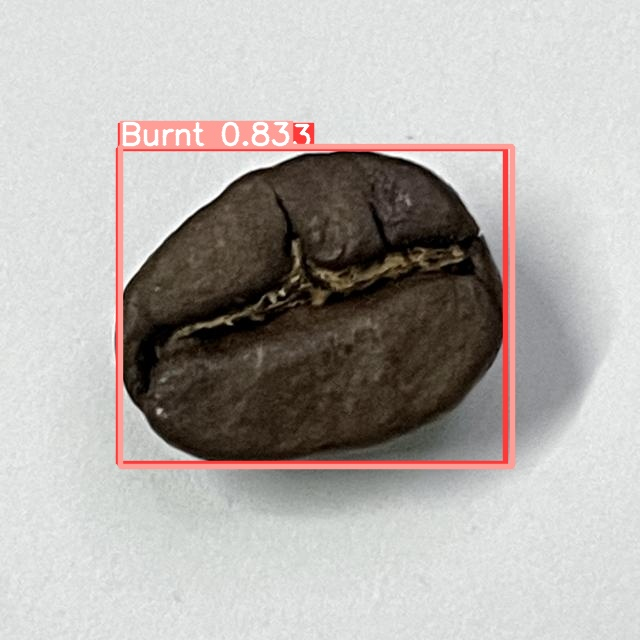

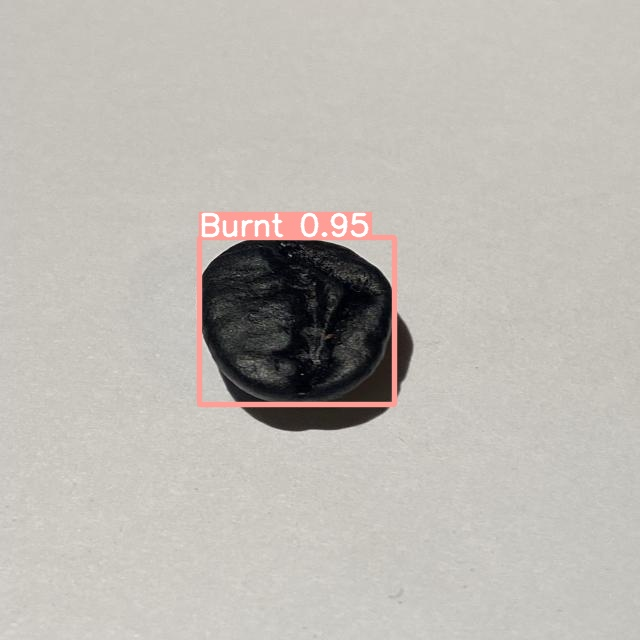

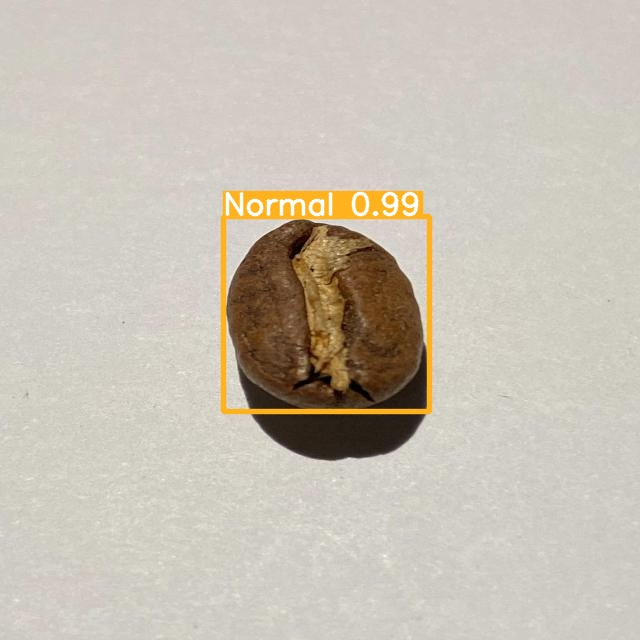

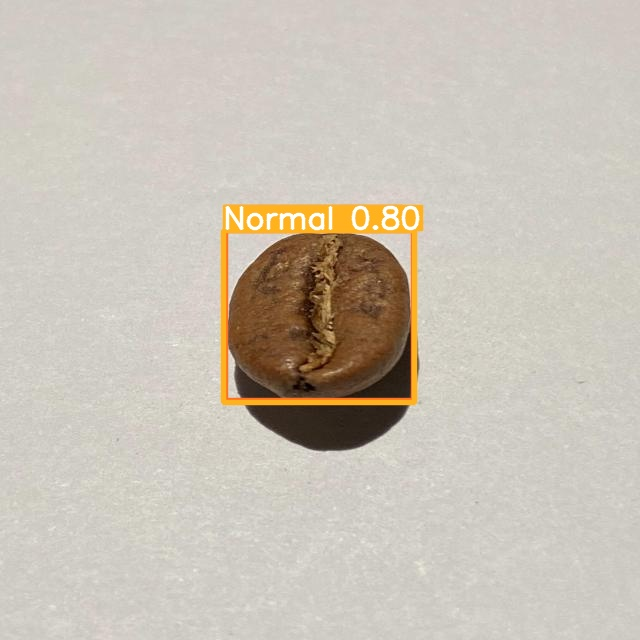

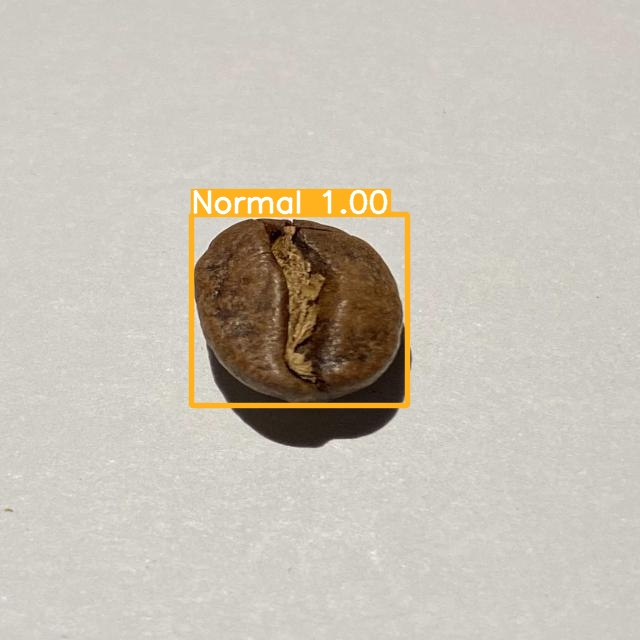

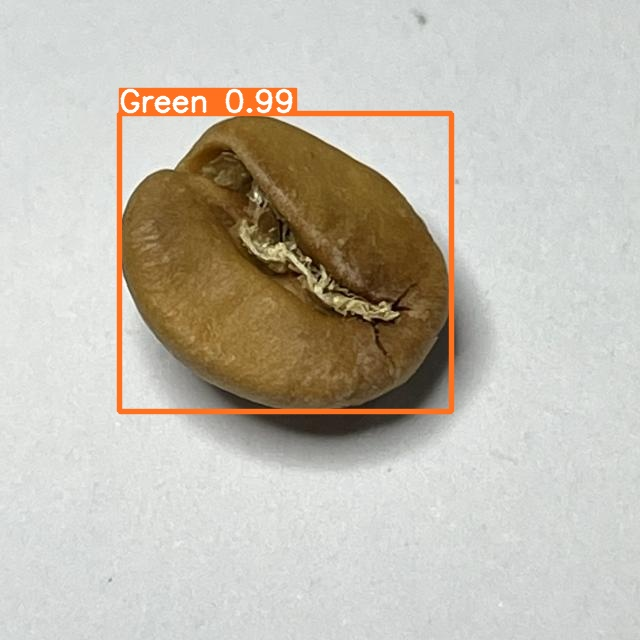

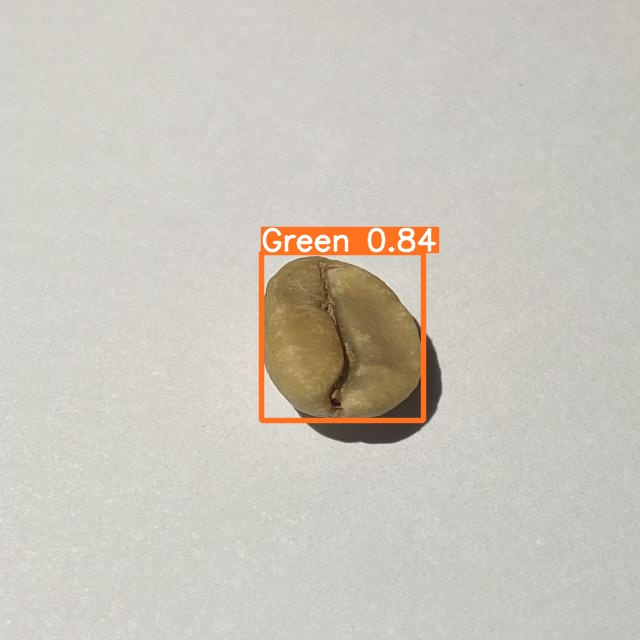

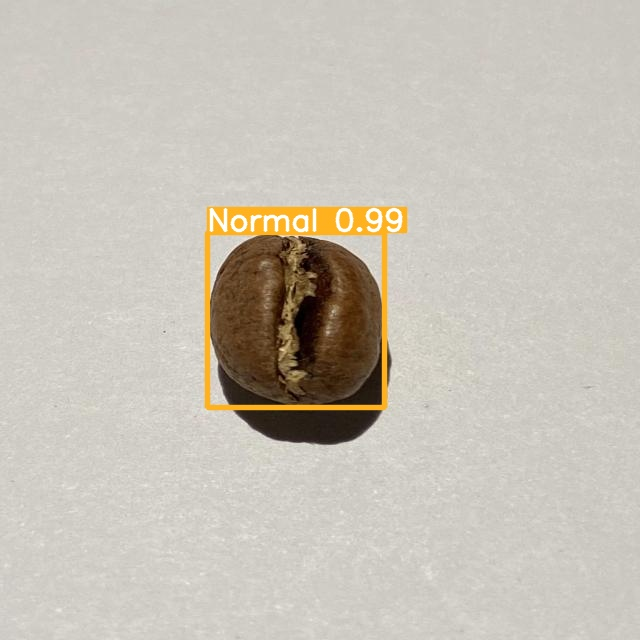

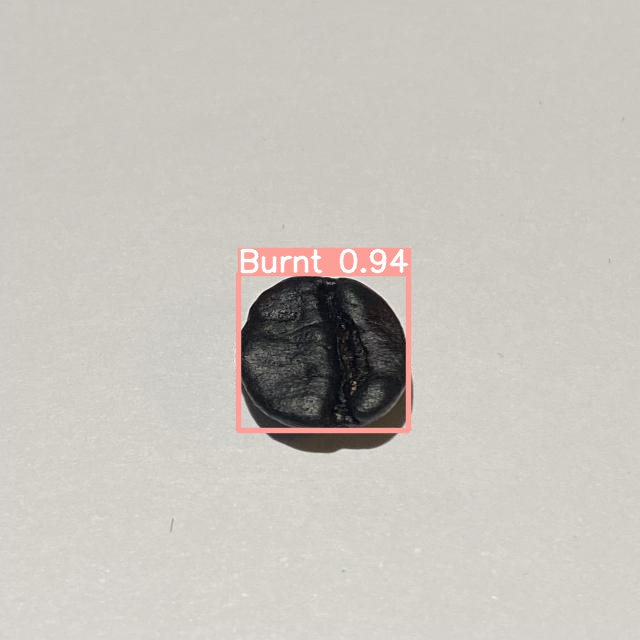

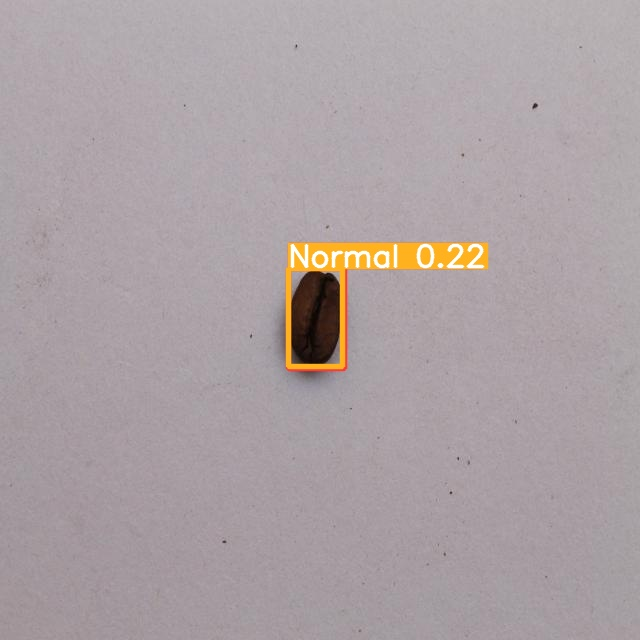

In [ ]:
import glob

from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/yolov9/runs/detect/exp3/*.jpg')[:16]:
      display(Image(filename=image_path, width=600))

## Weigth: gelan-e

In [ ]:
%cd {HOME}/yolov9

!python train.py \
--batch 1 --epochs 32 --img 416 --device 0 --min-items 4 --close-mosaic 16 \
--data {dataset.location}/data.yaml \
--weights {HOME}/weights/gelan-e.pt \
--cfg models/detect/gelan-e.yaml \
--hyp hyp.scratch-high.yaml

/content/yolov9
2024-03-13 21:05:11.169326: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-13 21:05:11.169375: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-13 21:05:11.170921: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-13 21:05:12.225640: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=/content/weights/gelan-e.pt, cfg=models/detect/gelan-e.yaml, data=/content/yolov9/Bunnah-Project-23/data.yaml, hyp=hyp.scratch-high.yaml, epochs=16, batch_size=1, imgsz=416, rect=False, resume=False, nosave=Fal